In [1]:
'''
#### these modules are required to run the script
module use /g/data/hh5/public/modules
module load conda/analysis3
source /scratch/nf33/public/hackathon_env/bin/activate
'''

import xarray as xr
import matplotlib.pyplot as plt
import easygems.healpix as egh
import cartopy.crs as ccrs
import numpy as np
%run ~/hackathon-2025_project/hk25-AusNode-land/analysis/yll_functions.ipynb

In [2]:

# define paths
datapath = '/g/data/qx55/germany_node/d3hp003.zarr'
file = 'P1D'
zoom = 'z5'

# define the fname
fpath = f'{datapath}/{file}_mean_{zoom}_atm.zarr'

# open the zarr file
ds = xr.open_zarr(fpath)#.sel(time=ds['time'].dt.month.isin([6, 7, 8]))
ds_jja = ds.sel(time=ds['time'].dt.month.isin([6, 7, 8]))

# what variables are there in the dataset?
for key, longname in ds.data_vars.items():
    print(f'{key}: {longname.long_name}')

'''
#### some variables of interest ####

hflsd: latent heat flux
hfssd: sensible heat flux
huss: specific humidity in 2m
mrso: Water content of soil layers
orog: surface altitude
pr: precipitation flux
rlds: surface downwelling longwave radiation
rldscs: surface downwelling clear-sky longwave radiation
rlus: surface upwelling longwave radiation
rsds: surface downwelling shortwave radiation
rsdscs: surface downwelling clear-sky shortwave radiation
rsus: surface upwelling shortwave radiation
sftlf: cell area fraction occupied by land including lakes
tas: temperature in 2m
tauu: u-momentum flux at the surface
tauv: v-momentum flux at the surface
ts: surface temperature
uas: zonal wind in 10m
vas: meridional wind in 10m
'''


/home/561/yl1269/.local/lib/python3.10/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
/home/561/yl1269/.local/lib/python3.10/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


clivi: cloud ice path
clt: total cloud cover
clwvi: cloud condensed water path
egpvi: Atmosphere Geopotential Energy Content
einvi: Atmosphere Moist Internal Energy Content
ekhvi: Atmosphere Horizontal Kinetic Energy Content
ekvvi: Atmosphere Vertical Kinetic Energy Content
hflsd: latent heat flux
hfssd: sensible heat flux
hur: relative humidity
hus: Specific humidity
huss: specific humidity in 2m
mrso: Water content of soil layers
o3vi: ozone path
orog: surface altitude
pr: precipitation flux
prs: large-scale precipitation flux (snow)
prw: water vapor path
ps: surface pressure
psl: mean sea level pressure
qall: mass fraction of all hydrometeors in air
rlds: surface downwelling longwave radiation
rldscs: surface downwelling clear-sky longwave radiation
rlus: surface upwelling longwave radiation
rlut: toa outgoing longwave radiation
rlutcs: toa outgoing clear-sky longwave radiation
rsds: surface downwelling shortwave radiation
rsdscs: surface downwelling clear-sky shortwave radiation
rs

'\n#### some variables of interest ####\n\nhflsd: latent heat flux\nhfssd: sensible heat flux\nhuss: specific humidity in 2m\nmrso: Water content of soil layers\norog: surface altitude\npr: precipitation flux\nrlds: surface downwelling longwave radiation\nrldscs: surface downwelling clear-sky longwave radiation\nrlus: surface upwelling longwave radiation\nrsds: surface downwelling shortwave radiation\nrsdscs: surface downwelling clear-sky shortwave radiation\nrsus: surface upwelling shortwave radiation\nsftlf: cell area fraction occupied by land including lakes\ntas: temperature in 2m\ntauu: u-momentum flux at the surface\ntauv: v-momentum flux at the surface\nts: surface temperature\nuas: zonal wind in 10m\nvas: meridional wind in 10m\n'

In [3]:
ds_jja.time

<xarray.DataArray 'time' (time: 92)>
array(['2020-06-01T00:00:00.000000000', '2020-06-02T00:00:00.000000000',
       '2020-06-03T00:00:00.000000000', '2020-06-04T00:00:00.000000000',
       '2020-06-05T00:00:00.000000000', '2020-06-06T00:00:00.000000000',
       '2020-06-07T00:00:00.000000000', '2020-06-08T00:00:00.000000000',
       '2020-06-09T00:00:00.000000000', '2020-06-10T00:00:00.000000000',
       '2020-06-11T00:00:00.000000000', '2020-06-12T00:00:00.000000000',
       '2020-06-13T00:00:00.000000000', '2020-06-14T00:00:00.000000000',
       '2020-06-15T00:00:00.000000000', '2020-06-16T00:00:00.000000000',
       '2020-06-17T00:00:00.000000000', '2020-06-18T00:00:00.000000000',
       '2020-06-19T00:00:00.000000000', '2020-06-20T00:00:00.000000000',
       '2020-06-21T00:00:00.000000000', '2020-06-22T00:00:00.000000000',
       '2020-06-23T00:00:00.000000000', '2020-06-24T00:00:00.000000000',
       '2020-06-25T00:00:00.000000000', '2020-06-26T00:00:00.000000000',
       '2020-06-27T00:00:00.000000000', '2020-06-28T00:00:00.000000000',
       '2020-06-29T00:00:00.000000000', '2020-06-30T00:00:00.000000000',
       '2020-07-01T00:00:00.000000000', '2020-07-02T00:00:00.000000000',
       '2020-07-03T00:00:00.000000000', '2020-07-04T00:00:00.000000000',
       '2020-07-05T00:00:00.000000000', '2020-07-06T00:00:00.000000000',
       '2020-07-07T00:00:00.000000000', '2020-07-08T00:00:00.000000000',
       '2020-07-09T00:00:00.000000000', '2020-07-10T00:00:00.000000000',
       '2020-07-11T00:00:00.000000000', '2020-07-12T00:00:00.000000000',
       '2020-07-13T00:00:00.000000000', '2020-07-14T00:00:00.000000000',
       '2020-07-15T00:00:00.000000000', '2020-07-16T00:00:00.000000000',
       '2020-07-17T00:00:00.000000000', '2020-07-18T00:00:00.000000000',
       '2020-07-19T00:00:00.000000000', '2020-07-20T00:00:00.000000000',
       '2020-07-21T00:00:00.000000000', '2020-07-22T00:00:00.000000000',
       '2020-07-23T00:00:00.000000000', '2020-07-24T00:00:00.000000000',
       '2020-07-25T00:00:00.000000000', '2020-07-26T00:00:00.000000000',
       '2020-07-27T00:00:00.000000000', '2020-07-28T00:00:00.000000000',
       '2020-07-29T00:00:00.000000000', '2020-07-30T00:00:00.000000000',
       '2020-07-31T00:00:00.000000000', '2020-08-01T00:00:00.000000000',
       '2020-08-02T00:00:00.000000000', '2020-08-03T00:00:00.000000000',
       '2020-08-04T00:00:00.000000000', '2020-08-05T00:00:00.000000000',
       '2020-08-06T00:00:00.000000000', '2020-08-07T00:00:00.000000000',
       '2020-08-08T00:00:00.000000000', '2020-08-09T00:00:00.000000000',
       '2020-08-10T00:00:00.000000000', '2020-08-11T00:00:00.000000000',
       '2020-08-12T00:00:00.000000000', '2020-08-13T00:00:00.000000000',
       '2020-08-14T00:00:00.000000000', '2020-08-15T00:00:00.000000000',
       '2020-08-16T00:00:00.000000000', '2020-08-17T00:00:00.000000000',
       '2020-08-18T00:00:00.000000000', '2020-08-19T00:00:00.000000000',
       '2020-08-20T00:00:00.000000000', '2020-08-21T00:00:00.000000000',
       '2020-08-22T00:00:00.000000000', '2020-08-23T00:00:00.000000000',
       '2020-08-24T00:00:00.000000000', '2020-08-25T00:00:00.000000000',
       '2020-08-26T00:00:00.000000000', '2020-08-27T00:00:00.000000000',
       '2020-08-28T00:00:00.000000000', '2020-08-29T00:00:00.000000000',
       '2020-08-30T00:00:00.000000000', '2020-08-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2020-06-01 2020-06-02 ... 2020-08-31
Attributes:
    axis:     T

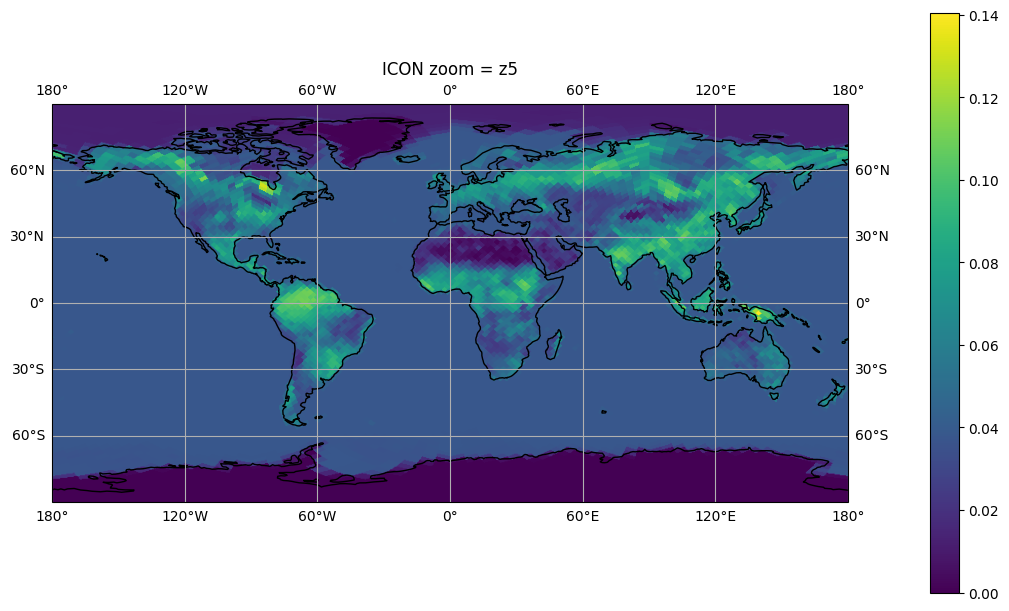

/home/561/yl1269/.local/lib/python3.10/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/561/yl1269/.local/lib/python3.10/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/home/561/yl1269/.local/lib/python3.10/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/561/yl1269/.local/lib/python3.10/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


In [4]:
# choose a variable to plot
da = ds_jja['mrso']

# test plot some data
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

data = da.isel(time=20, soil_level=1)
ax.set_global()
im = egh.healpix_show(data.values,ax=ax)
ax.set_title(f'ICON zoom = {zoom}')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()


In [5]:
ds_jja['mrso']

<xarray.DataArray 'mrso' (time: 92, soil_level: 5, cell: 12288)>
dask.array<getitem, shape=(92, 5, 12288), dtype=float32, chunksize=(4, 1, 12288), chunktype=numpy.ndarray>
Coordinates:
  * soil_level  (soil_level) int64 0 0 0 2 6
  * time        (time) datetime64[ns] 2020-06-01 2020-06-02 ... 2020-08-31
Dimensions without coordinates: cell
Attributes:
    grid_mapping:        crs
    hiopy::time_method:  mean
    hiopy::nnn:          4
    hiopy::enable:       True
    standard_name:       wtr_soil_sl
    units:               m
    short_name:          
    long_name:           Water content of soil layers

In [6]:
sm_surf = ds_jja['mrso'][:,0:3,:].mean(dim='soil_level')
sm_surf#.soil_level

<xarray.DataArray 'mrso' (time: 92, cell: 12288)>
dask.array<mean_agg-aggregate, shape=(92, 12288), dtype=float32, chunksize=(4, 12288), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-06-01 2020-06-02 ... 2020-08-31
Dimensions without coordinates: cell

In [7]:
sm_surf.mean(dim='time')

<xarray.DataArray 'mrso' (cell: 12288)>
dask.array<mean_agg-aggregate, shape=(12288,), dtype=float32, chunksize=(12288,), chunktype=numpy.ndarray>
Dimensions without coordinates: cell

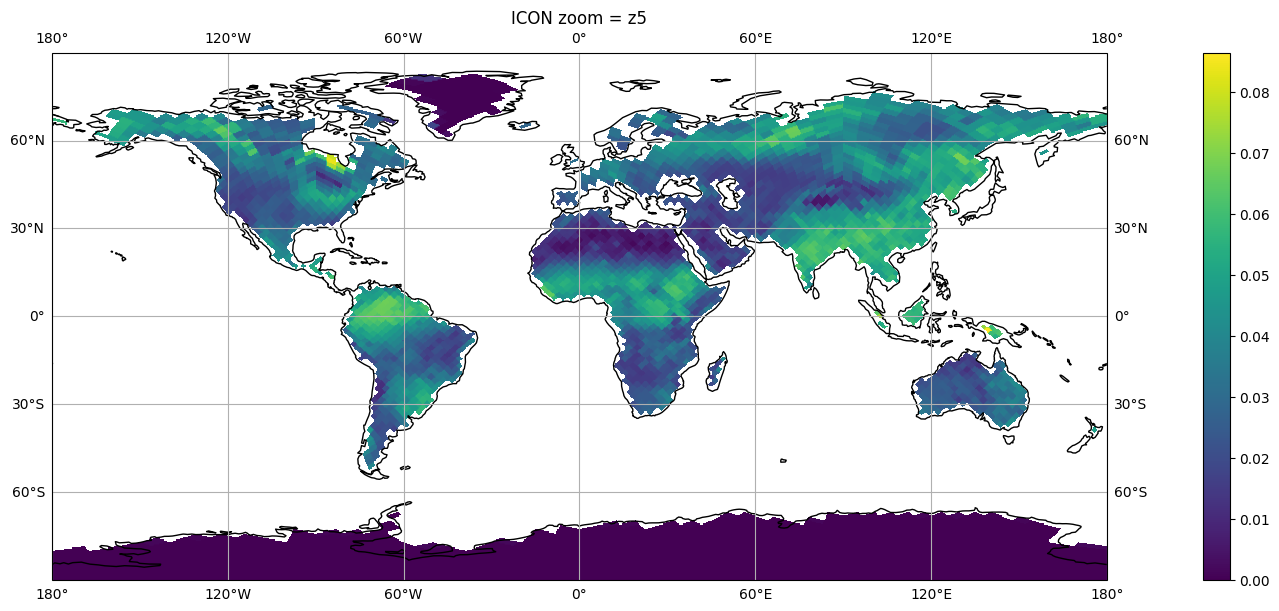

In [87]:
land = ds_jja['sftlf']
sm_surf = ds_jja['mrso'].isel(soil_level=[0,1]).mean(dim='soil_level')
sm_surf = xr.where(land >0.9, sm_surf, np.nan)

plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(13, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(sm_surf.mean(dim='time').values,ax=ax)
ax.set_title(f'ICON zoom = {zoom}')
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()


In [10]:
land = ds_jja['sftlf']
pr = xr.where(land >0.9, ds_jja['pr'], np.nan)
lh = xr.where(land >0.9, ds_jja['hflsd'], np.nan)*-1

sm_surf = ds_jja['mrso'][:,2,:]#.mean(dim='soil_level')
sm_surf = xr.where(land >0.9, sm_surf, np.nan)
sm_surf

<xarray.DataArray (cell: 12288, time: 92)>
dask.array<where, shape=(12288, 92), dtype=float32, chunksize=(12288, 4), chunktype=numpy.ndarray>
Coordinates:
    soil_level  int64 0
  * time        (time) datetime64[ns] 2020-06-01 2020-06-02 ... 2020-08-31
Dimensions without coordinates: cell

In [12]:
mov_corr_sm_pr = corr_window(sm_surf, pr, window_x=1, window_y=1).astype(np.float32)
mov_corr_sm_lh = corr_window(sm_surf, lh, window_x=1, window_y=1).astype(np.float32)
mov_corr_lh_pr = corr_window(lh, pr, window_x=1, window_y=1).astype(np.float32)

In [13]:
mov_corr_sm_pr

<xarray.DataArray (cell: 12288)>
dask.array<astype, shape=(12288,), dtype=float32, chunksize=(12288,), chunktype=numpy.ndarray>
Coordinates:
    soil_level  int64 0
Dimensions without coordinates: cell

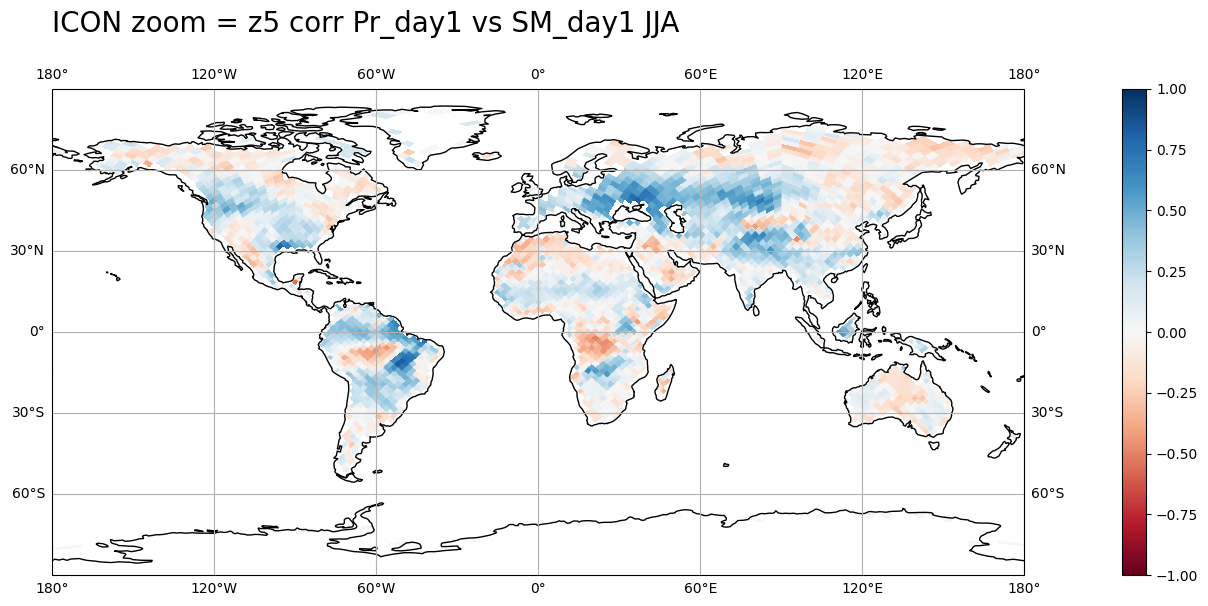

In [16]:
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(13, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(mov_corr_sm_pr.values,ax=ax,cmap='RdBu',vmin=-1, vmax=1)
ax.set_title(f'ICON zoom = {zoom} corr Pr_day1 vs SM_day1 JJA', loc='left', fontsize=20, y=1.1)
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()


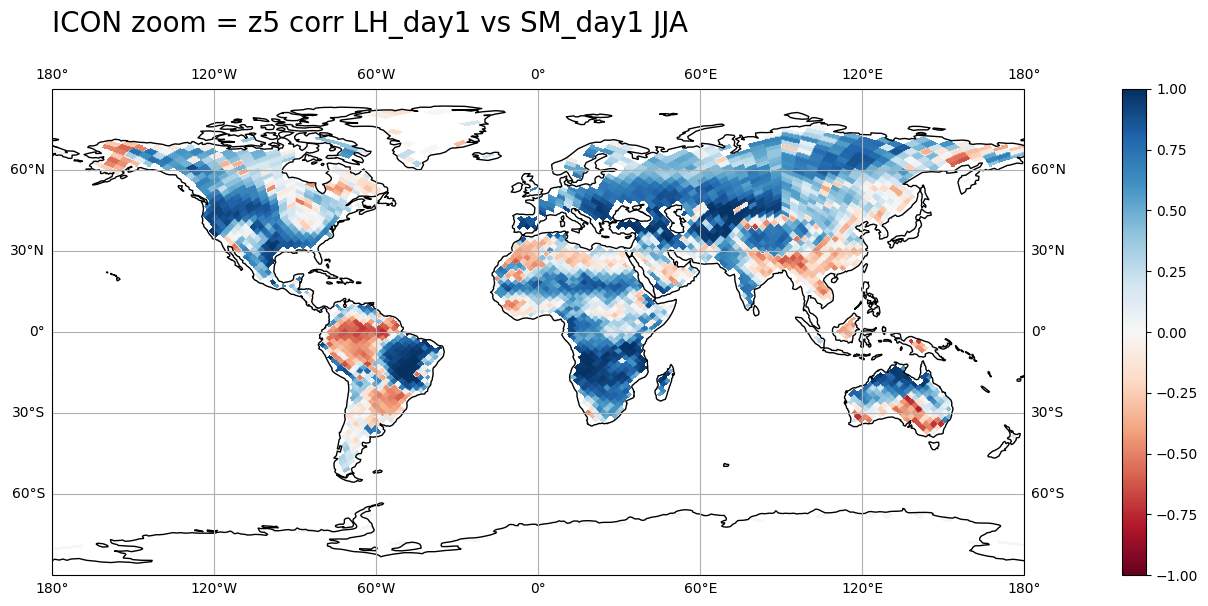

In [17]:
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(13, 6), subplot_kw={'projection': projection}, layout='constrained')
mov_corr_sm_lh = corr_window(sm_surf, lh, window_x=1, window_y=1)

ax.set_global()
im = egh.healpix_show(mov_corr_sm_lh.values,ax=ax,cmap='RdBu',vmin=-1, vmax=1)
ax.set_title(f'ICON zoom = {zoom} corr LH_day1 vs SM_day1 JJA', loc='left', fontsize=20, y=1.1)
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()


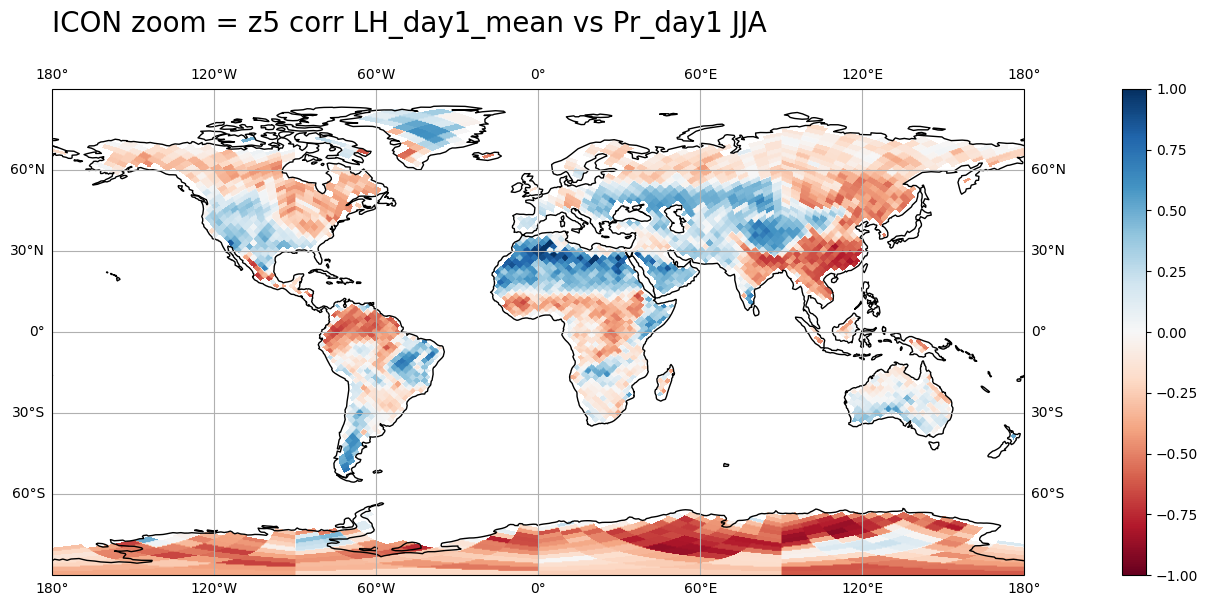

In [18]:
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(13, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(mov_corr_lh_pr.values,ax=ax,cmap='RdBu',vmin=-1, vmax=1)
ax.set_title(f'ICON zoom = {zoom} corr LH_day1_mean vs Pr_day1 JJA', loc='left', fontsize=20, y=1.1)
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()


In [147]:
mov_corr_sm_pr = corr_window(sm_surf, pr, window_x=1, window_y=9).astype(np.float32)
mov_corr_sm_lh = corr_window(sm_surf, lh, window_x=1, window_y=9).astype(np.float32)
mov_corr_lh_pr = corr_window(lh, pr, window_x=1, window_y=9).astype(np.float32)

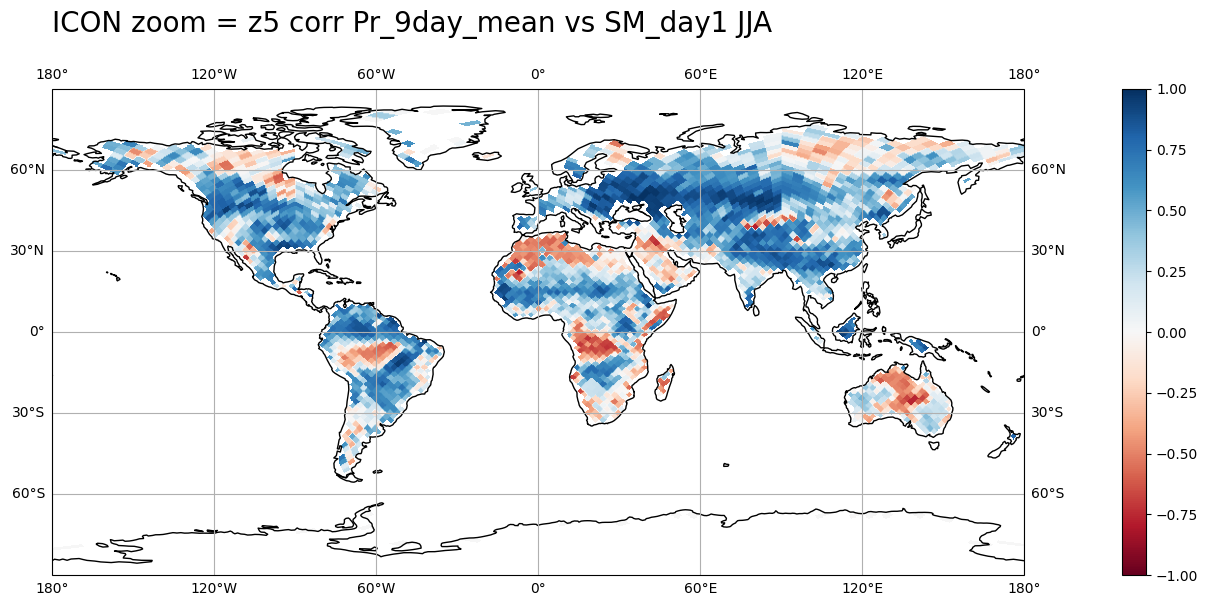

In [148]:
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(13, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(mov_corr_sm_pr.values,ax=ax,cmap='RdBu',vmin=-1, vmax=1)
ax.set_title(f'ICON zoom = {zoom} corr Pr_9day_mean vs SM_day1 JJA', loc='left', fontsize=20, y=1.1)
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()


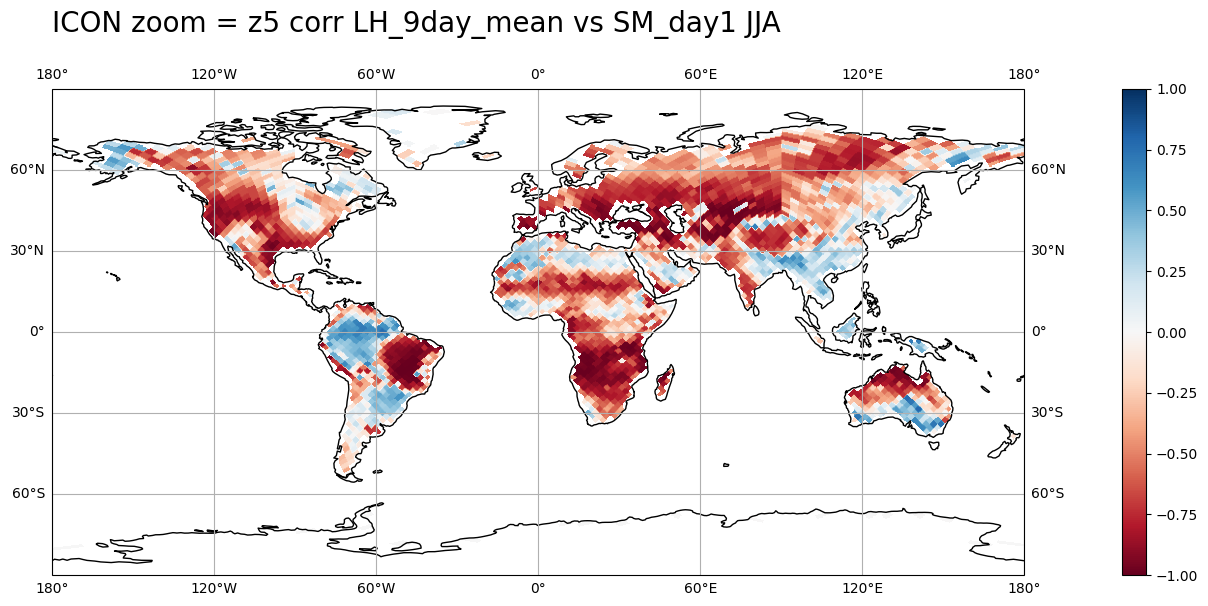

In [149]:
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(13, 6), subplot_kw={'projection': projection}, layout='constrained')
mov_corr_sm_lh = corr_window(sm_surf, lh, window_x=1, window_y=1)

ax.set_global()
im = egh.healpix_show(mov_corr_sm_lh.values,ax=ax,cmap='RdBu',vmin=-1, vmax=1)
ax.set_title(f'ICON zoom = {zoom} corr LH_9day_mean vs SM_day1 JJA', loc='left', fontsize=20, y=1.1)
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()


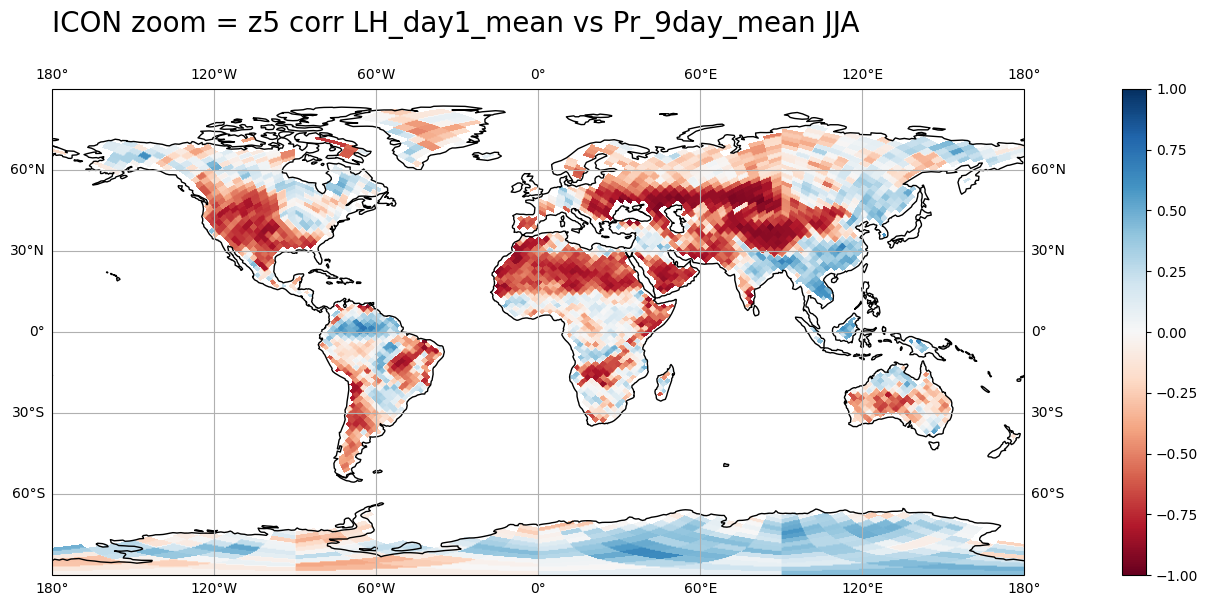

In [150]:
plt.close('all')
projection=ccrs.PlateCarree(central_longitude=0.0)
fig, ax = plt.subplots(figsize=(13, 6), subplot_kw={'projection': projection}, layout='constrained')

ax.set_global()
im = egh.healpix_show(mov_corr_lh_pr.values,ax=ax,cmap='RdBu',vmin=-1, vmax=1)
ax.set_title(f'ICON zoom = {zoom} corr LH_day1_mean vs Pr_9day_mean JJA', loc='left', fontsize=20, y=1.1)
ax.coastlines()
ax.gridlines(draw_labels=True)
fig.colorbar(im,orientation='vertical')

plt.show()
